In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [5]:
df = pd.read_csv(url)

In [6]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
325,2014,DODGE,DURANGO AWD FFV,SUV - STANDARD,3.6,6,A8,E,17.7,13.0,15.6,18,250
401,2014,FORD,FOCUS FFV,COMPACT,2.0,4,A6,X,8.8,6.4,7.7,37,177
964,2014,SUBARU,XV CROSSTREK HYBRID AWD,SUV - SMALL,2.0,4,AV,X,8.1,7.2,7.7,37,177
690,2014,MASERATI,GRANTURISMO,SUBCOMPACT,4.7,8,AS6,Z,18.2,11.4,15.1,19,347
718,2014,MAZDA,MX-5,TWO-SEATER,2.0,4,AS6,Z,11.5,8.5,10.2,28,235


In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [14]:
cdf = df[['ENGINESIZE' , 'CYLINDERS', 'FUELCONSUMPTION_COMB','CO2EMISSIONS']]

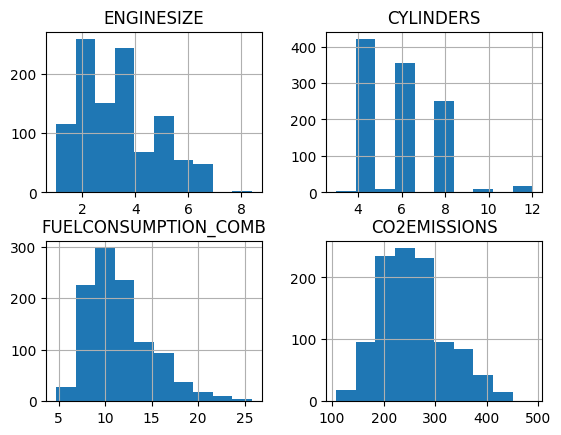

In [15]:
cdf.hist()
plt.show()

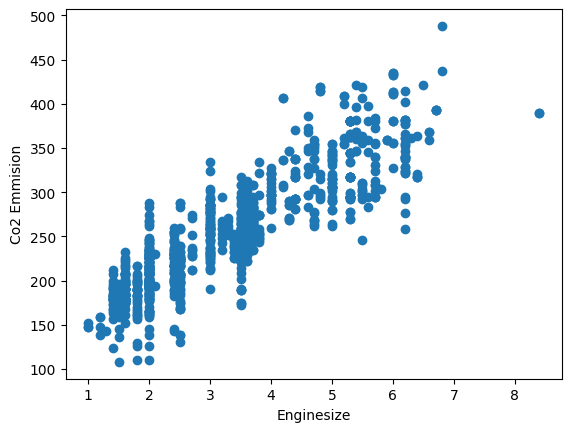

In [17]:
plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS)
plt.xlabel("Enginesize")
plt.ylabel("Co2 Emmision")
plt.show()

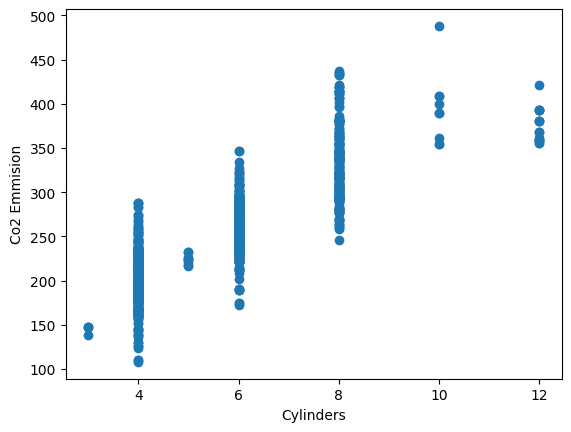

In [18]:
plt.scatter(cdf.CYLINDERS , cdf.CO2EMISSIONS)
plt.xlabel("Cylinders")
plt.ylabel("Co2 Emmision")
plt.show()

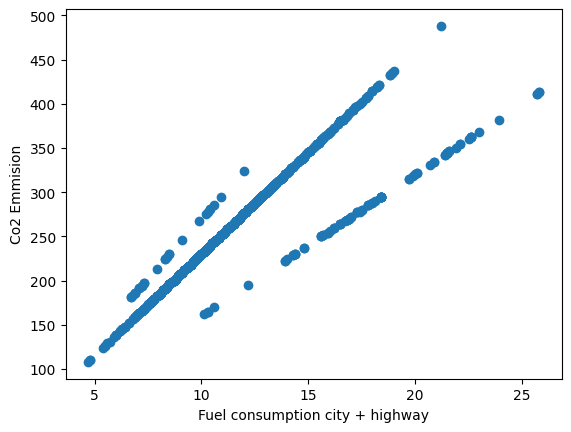

In [19]:
plt.scatter(cdf.FUELCONSUMPTION_COMB , cdf.CO2EMISSIONS)
plt.xlabel("Fuel consumption city + highway")
plt.ylabel("Co2 Emmision")
plt.show()

In [28]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [31]:
type(X) , type(y)

(numpy.ndarray, numpy.ndarray)

In [38]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=21)

In [39]:
np.shape(X_train) , np.shape(X_test) , np.shape(y_train) , np.shape(y_test)

((853,), (214,), (853,), (214,))

In [40]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train.reshape(-1 , 1), y_train)

LinearRegression()

In [41]:
print("Coeficient : ", linear_reg.coef_)
print("Intercept : ", linear_reg.intercept_)

Coeficient :  [39.21236454]
Intercept :  125.52114269028638


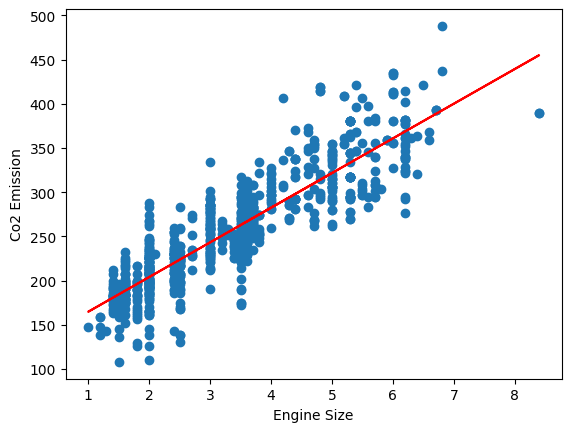

In [42]:
plt.scatter(X_train , y_train)
plt.plot(X_train , X_train*linear_reg.coef_ + linear_reg.intercept_ , '-r')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emission")
plt.show()

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = linear_reg.predict(X_test.reshape(-1 , 1))

print("Mean Absolute Error : " , mean_absolute_error(y_test , y_pred))
print("Mean Squared Error : " , mean_squared_error(y_test , y_pred))
print("Root Mean Squared Error : " , np.sqrt(mean_squared_error(y_test , y_pred)))
print("R2 Score : " , r2_score(y_test , y_pred))

Mean Absolute Error :  25.003537094289303
Mean Squared Error :  1076.7114937400534
Root Mean Squared Error :  32.81328227623767
R2 Score :  0.7344298011059157
